# Reviews Analysis

change runtime to GPU

In [1]:
# !nvidia-smi

# 1. Problem Identification & Goal Formulation

+ Problem:
  - In today's market, numerous services and products fall short of meeting user expectations, necessitating a system that can effectively recommend the highest quality options based on insights from user reviews.

+ Goal:
  - The primary objective is to develop a machine learning model that can accurately classify user reviews into two distinct categories: `Positive` and `Negative`. Furthermore, the model should identify and prioritize the `most highly recommended` services and products within the `"Positive" category`, while discouraging the usage of those falling under the `"Negative" category`. This will help users make informed decisions and enhance their overall experience.

# 2. Data Collection

In [2]:
import os
import pandas as pd

In [3]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [4]:
home= os.getcwd()
home

'd:\\Projects\\RA'

load train data

In [5]:
train_data= pd.read_csv(f"{home}/data/train_data/train.csv", names= ['result', 'title', 'reviews']).head(100)

In [6]:
train_data= train_data['result'].replace[:100000,:]

In [7]:
train_data.head()

,result,title,reviews
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [8]:
train_data.tail()

,result,title,reviews
95,1,Very Not Worth Your Time,The book was wriiten very horribly. I would ne...
96,2,Very fun and educational,"Trains, shapes and pegs - a winning combinatio..."
97,1,Ludicrous and silly,I remember getting this book so faintly that t...
98,2,Artistry,I think that the Deodato concerts are very ric...
99,1,Caution!,"These tracks are not the ""original"" versions b..."


load test data

In [9]:
test_data= pd.read_csv(f"{home}/data/test_data/test.csv", names= ['result', 'title', 'reviews']).head(20)

In [10]:
test_data= test_data.iloc[:20000,:]

In [11]:
test_data.head()

,result,title,reviews
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [12]:
test_data.tail()

,result,title,reviews
15,1,Don't buy!,"First of all, the company took my money and se..."
16,2,"Simple, Durable, Fun game for all ages",This is an AWESOME game! Almost everyone know ...
17,2,Review of Kelly Club for Toddlers,"For the price of 7.99, this PC game is WELL wo..."
18,2,SOY UN APASIONADO DEL BOX,"Y ESTE LIBRO ESTÁ ESPLÉNDIDO !Lo disfrutas, lo..."
19,2,Some of the best fiddle playing I have heard i...,This is an excellent album with some great fid...


unique classes

In [70]:
labels= train_data['result'].unique()
labels

array([2, 1], dtype=int64)

# 3. Preprocessing

drop missing values

In [14]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [15]:
train_data.isna().sum()

result     0
title      0
reviews    0
dtype: int64

In [16]:
test_data.isna().sum()

result     0
title      0
reviews    0
dtype: int64

drop duplicates

In [17]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

we have column `title` not necessary, so we drop it

In [18]:
train_data.drop('title', axis=1, inplace= True)

In [19]:
test_data.drop('title', axis=1, inplace= True)

now, we will start the preprcessing step for NLP

Noise Removal

In [20]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

show stop words list

In [21]:
stop_words= stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

excluding some useful words from stop words list

In [22]:
excluding= ['againts','no' ,'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
            "didn't",'doesn', "doesn't", 'hadn', "hadn't", 'has', "hasn't", 'haven', "haven't", 'isn',
            "isn't", 'might', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't",
            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stop_words= [word for word in stop_words if word not in excluding]
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

Tokenization

In [23]:
from nltk.tokenize import word_tokenize, sent_tokenize
# nltk.download('punkt')
# nltk.download('wordnet')

Word normalization with `PorterStemmer` and `WordNetLemmatizer`

In [24]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
stemmer= PorterStemmer()
lemmatizer= WordNetLemmatizer()

Define funcation preprocessing

In [25]:
def preprocessing(text):
  cleaned_texts= []
  sentences = sent_tokenize(text)

  # loop on each sentence
  for sent in sentences:
    filtered_sent= []
    tokens= word_tokenize(sent.lower())

    # loop on each word from sentence
    for token in tokens:
      # check if it's not numeric and its length > 2 and not in stop words
      if (not token.isnumeric()) and (len(token) > 2) and (token not in stop_words):
        stemmed_token = stemmer.stem(token)
        lemmatized_token = lemmatizer.lemmatize(stemmed_token)
        filtered_sent.append(lemmatized_token)

    # convert tokens to sentence
    cleaned_sent= " ".join(filtered_sent)
    cleaned_texts.append(cleaned_sent)

  # Combine all cleaned sentences into a single string
  preprocessed_text = " ".join(cleaned_texts)
  return preprocessed_text

In [26]:
test_data['reviews'][2]

'I bought this charger in Jul 2003 and it worked OK for a while. The design is nice and convenient. However, after about a year, the batteries would not hold a charge. Might as well just get alkaline disposables, or look elsewhere for a charger that comes with batteries that have better staying power.'

In [27]:
x = preprocessing(test_data['reviews'][2])
x

'bought charger jul work design nice conveni howev year batteri would not hold charg might well get alkalin dispos look elsewher charger come batteri better stay power'

In [28]:
X_train= train_data['reviews'].values
y_train= train_data['result'].values.tolist()

In [29]:
X_test= test_data['reviews'].values
y_test= test_data['result'].values.tolist()

# 4. EDA

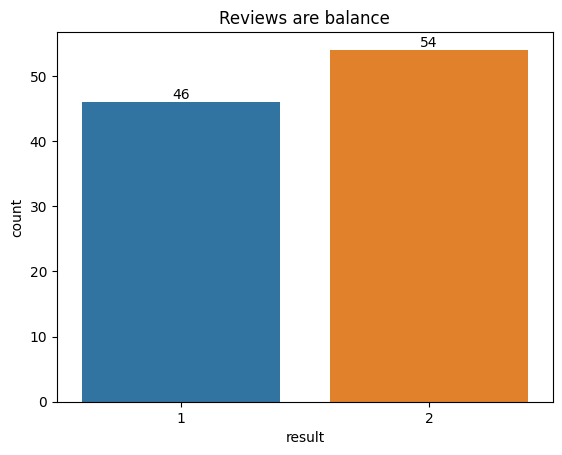

In [73]:
# plot
ax= sns.countplot(x=train_data['result'],
                  data=train_data)

for p in ax.patches: # bars
    '''
    get_bbox(): return bounding box of the bar, 
    get_points(): returns the coordinates of the four corners of the bounding box.
    '''
    x= p.get_bbox().get_points()[:,0] # extract the x-coordinates of the four corners of the bar rectangle
    y= p.get_bbox().get_points()[1,1] # extract the y-coordinate of the top-right corner
    ax.annotate(f'{y:.0f}', (x.mean(), y), ha='center',va='bottom') # text on top bar
    
plt.title("Reviews are balance")
plt.show()

# 5. Model Selection

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

Define the pipeline

In [31]:
pipeline= Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor= preprocessing, tokenizer=word_tokenize)),
    ('nb', MultinomialNB())
])

Define a grid of hyperparameters for the MultinomialNB model


In [32]:
param_grid_nb= {
    'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__min_df': [1, 2, 3],
    'nb__alpha': [0.1, 0.01, 0.001]
}

Create GridSearchCV instance

In [33]:
grid_search= GridSearchCV(pipeline,
                          param_grid= param_grid_nb,
                          cv= 5,
                          return_train_score= True)

# 5. Model Training

In [34]:
type(y_train)

list

In [35]:
type(X_train)

numpy.ndarray

Fit the GridSearchCV on your training data

In [36]:
grid_search.fit(X_train, y_train)

c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\CENTER_ELRahama\AppData\Local\Programs\Python\Python311\Lib\site-pa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(preprocessor=<function preprocessing at 0x000001F39C9BD6C0>,
                                                        tokenizer=<function word_tokenize at 0x000001F3251FE3E0>)),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.1, 0.01, 0.001],
                         'tfidf__max_df': [0.5, 0.75, 1.0],
                         'tfidf__min_df': [1, 2, 3],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)]},
             return_train_score=True)

params for number of iteration

In [37]:
pd.DataFrame(grid_search.cv_results_)[['params']]

,params
0,"{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid..."
1,"{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid..."
2,"{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid..."
3,"{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid..."
4,"{'nb__alpha': 0.1, 'tfidf__max_df': 0.5, 'tfid..."
...,...
76,"{'nb__alpha': 0.001, 'tfidf__max_df': 1.0, 'tf..."
77,"{'nb__alpha': 0.001, 'tfidf__max_df': 1.0, 'tf..."
78,"{'nb__alpha': 0.001, 'tfidf__max_df': 1.0, 'tf..."
79,"{'nb__alpha': 0.001, 'tfidf__max_df': 1.0, 'tf..."


Best parameters

In [38]:
grid_search.best_params_

{'nb__alpha': 0.1,
 'tfidf__max_df': 0.5,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 2)}

Best score

In [39]:
f"{round(grid_search.best_score_*100)}%"

'78%'

 Get the best estimator

In [40]:
best_pipline= grid_search.best_estimator_

# 6. Model Evaluation

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

 Now you can use the best_pipeline for prediction

In [60]:
y_pred= best_pipline.predict(X_test)

accuracy_score

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100)}%")

Accuracy: 85%


confusion_matrix

In [62]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  2],
       [ 1, 10]], dtype=int64)

# 7. Visualization

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

Heatmap

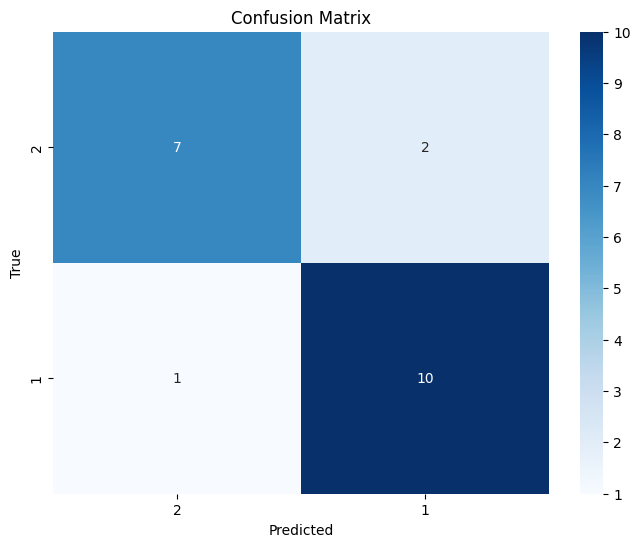

In [64]:
plt.figure(figsize = (8,6))
sns.heatmap(cm,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap='Blues',
            fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 7. Save Model

In [65]:
import joblib
model_path = f'{home}/models/pp_tfidf_nb_85.joblib'
joblib.dump(best_pipline, model_path)

['d:\\Projects\\RA/models/pps_tfidf_nb.joblib']

In [66]:
model= joblib.load(model_path)

In [84]:
model.predict(["hello it's good, i want to buy it"])

array([2])